University of Helsinki, Master's Programme in Data Science  
DATA20046 Neural Networks and Deep Learning - Spring 2025  
Arto Klami, Aapo Hyvärinen  

# Problem Set 1: Introduction

## Basic definitions

### Mathematical exercises (16 pts)

1. (8 pts) One proposal as activation function is the **"leaky ReLU"**: $$\psi(x) = \begin{cases} x, & \text{if } x \geq 0 \\  \alpha x, & \text{if } x < 0 \end{cases}$$ For some constant $0 \leq \alpha \leq 1$, typically small.

     - (a) Show that the basic ReLU is a special case of this.
     - (b) Show that the linear activation function is also a special case.
     - (c) Show that the leaky ReLU can also be expressed as: $$\psi(x) = \max(\alpha x, x)$$

---

- (a) If we set $\alpha = 0$ we obtain the basic ReLU function $$ReLU(x) = \begin{cases} x, & \text{if } x \geq 0 \\ 0, & \text{if } x < 0 \end{cases}$$
- (b) If we set $\alpha = 1$ we obtain the linear function $$f(x) = \begin{cases} x, & \text{if } x \geq 0 \\ x, & \text{if } x < 0 \end{cases}$$
- (c) If we consider $x \geq 0$ we obtain $\max(\alpha x, x) = x$ since $0 \leq \alpha \lt 1$ can only decrease the value of $\alpha x$ compared to $x$, on the other hand if we consider $x \lt 0$ we obtain $\max(\alpha x, x) = \alpha x$ for the same reasoning. In the case in which $\alpha = 1$ we trivially obtain $\max(\alpha x, x) = x = \alpha x$.

---

1. (8 pts) Take a multi-layer neural network with linear activation function: $$y_K = W_K W_{K-1} \ldots W_2 W_1 x = M x =: g(x)$$ where the total function given by the NN is denoted by $g$.

	- (a) Suppose we know that $W_1$ is of size $m \times n$. What kind of constraint does this imply on the size of $W_2$?
	- (b) Suppose again that we know that W1 is of size $m \times n$. What is a necessary condition on $m,n$ to make it possible that the neural
network is injective (also called invertible in NN literature), meaning that for any output y you can compute the original x. (A non-rigorous answer is fine.)
	- (c) Assume that all matrices $W_i$ are square (same number of rows and columns). In the case of an arbitrary number of layers, give a necessary and sufficient condition on the $W_i$ such that this $g$ is injective.

---

- (a) Since $W_1 \in \mathbb{R}^{m \times n}$ (m = rows, n = cols) then $x \in \mathbb{R}^{n}$ and $W_1 x = y$ where $y \in \mathbb{R}^{m}$. So in order for the multiplication $W_2 y = z$ to work we need that $W_2 \in \mathbb{R}^{q \times m}$.
- (b) In order for the neural network to be invertible we need the matrix to be invertible, so that we can have $x = W_1^{-1} y$. For a matrix to be invertible it should satisfy $m = n$, e.g. $W_1 \in \mathbb{R}^{m \times m}$. It should be mentioned that the injective property is also satisfied in the case where the matrix achieves full column rank and $m \gt n$ but in which case only the pseudo-inverse is permitted.  
- (c) Assuming that all matrices $W_i$ are square the sufficient condition for matrix inversion is that they should be non singular, in other words their deteriminant should be non zero, $|W_i| \ne 0$.

### Computer assignments (18 pts)

1. (9 pts) Construct a neural network using PyTorch. As architecture, take a fully connected neural network with three layers of weights, and five neurons in each layer. (Thus, the input and the output are also 5-dimensional.) Try out the tanh, ReLU, and linear activation functions, always the same activation everywhere in the NN.
2. (9 pts) Create three sets of random weight vectors (for different plots to be made). Plot y1, that is the first entry of the output vector, as a function of x1 from −10.0 to 10.0, when all the other xi,i > 1 are fixed to random values. Report three plots (corresponding to the three sets of random
weights) for each of the three activation functions; in total, nine plots.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

#### (1)

In [ ]:
activation_function_list = [nn.ReLU(), nn.Tanh(), nn.LeakyReLU(negative_slope = 1)]
activation_function_names = ["ReLU", "tanh", "linear"]
neural_network = None
for activation_function in activation_function_list:
    neural_network = nn.Sequential(
		nn.Linear(5, 5, bias = False)
		,activation_function
		,nn.Linear(5, 5, bias = False)
		,activation_function
		,nn.Linear(5, 5, bias = False)
		,activation_function
	)

#### (2)

In [ ]:
torch.manual_seed(0)

In [46]:
weight_sets = [
	[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
	,[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
	,[torch.rand(5, 5), torch.rand(5, 5), torch.rand(5, 5)]
]

x = torch.linspace(-10, 10, 1000)
x_rest = torch.rand(4)
results = torch.empty(len(activation_function_list), len(weight_sets), x.size(dim=0))

In [ ]:
print(f"Visualizing random weights")
for i, weight_set in enumerate(weight_sets):
	print(f"Weight Set {i + 1}:")
	for j, weights in enumerate(weight_set):
		print(f"Layer {j + 1} Weights:\n{weights.numpy()}\n")

Visualizing random weights
Weight Set 1:
Layer 1 Weights:
[[0.6225418  0.36847812 0.8823178  0.5834557  0.09108943]
 [0.11962289 0.23941821 0.7394386  0.17717719 0.27126354]
 [0.5907748  0.15335107 0.25378734 0.95339257 0.23565316]
 [0.33341414 0.8576003  0.61204207 0.8924498  0.05950505]
 [0.74992275 0.42352104 0.17967683 0.28585178 0.01636291]]

Layer 2 Weights:
[[0.8458876  0.4040594  0.00972778 0.9276083  0.82385266]
 [0.70674133 0.98936516 0.95152706 0.96727926 0.9477628 ]
 [0.9063387  0.63089454 0.4581272  0.51901466 0.29221117]
 [0.73492885 0.5144853  0.617963   0.17792618 0.31173575]
 [0.87485135 0.5486307  0.6725459  0.06349629 0.28588694]]

Layer 3 Weights:
[[0.4872747  0.44753224 0.81917244 0.34910762 0.9172987 ]
 [0.4032961  0.69447446 0.147986   0.5848667  0.01253152]
 [0.0710057  0.17999738 0.63997847 0.5387535  0.54839224]
 [0.44530576 0.9201248  0.98980004 0.7123442  0.8976275 ]
 [0.475289   0.3161841  0.5972046  0.8287679  0.4227242 ]]

Weight Set 2:
Layer 1 Weights:
[

In [ ]:
with torch.no_grad():
	for function_idx, activation_function in enumerate(activation_function_list):
		neural_network = nn.Sequential(
			nn.Linear(5, 5, bias = False) 	# 1 layer (idx 0)
			,activation_function			# 2 layer (idx 1)
			,nn.Linear(5, 5, bias = False)	# 3 layer (idx 2)
			,activation_function			# 4 layer
			,nn.Linear(5, 5, bias = False)	# 5 layer
			,activation_function			# 6 layer
		)
		for weight_idx, weight_set in enumerate(weight_sets):
			neural_network[0].weight.copy_(weight_set[0])
			neural_network[2].weight.copy_(weight_set[1])
			neural_network[4].weight.copy_(weight_set[2])
			for idx, x_i in enumerate(x):
				input = torch.cat( (x_i.reshape(1), x_rest), dim = -1 )
				results[function_idx][weight_idx][idx] = neural_network(input)[0]

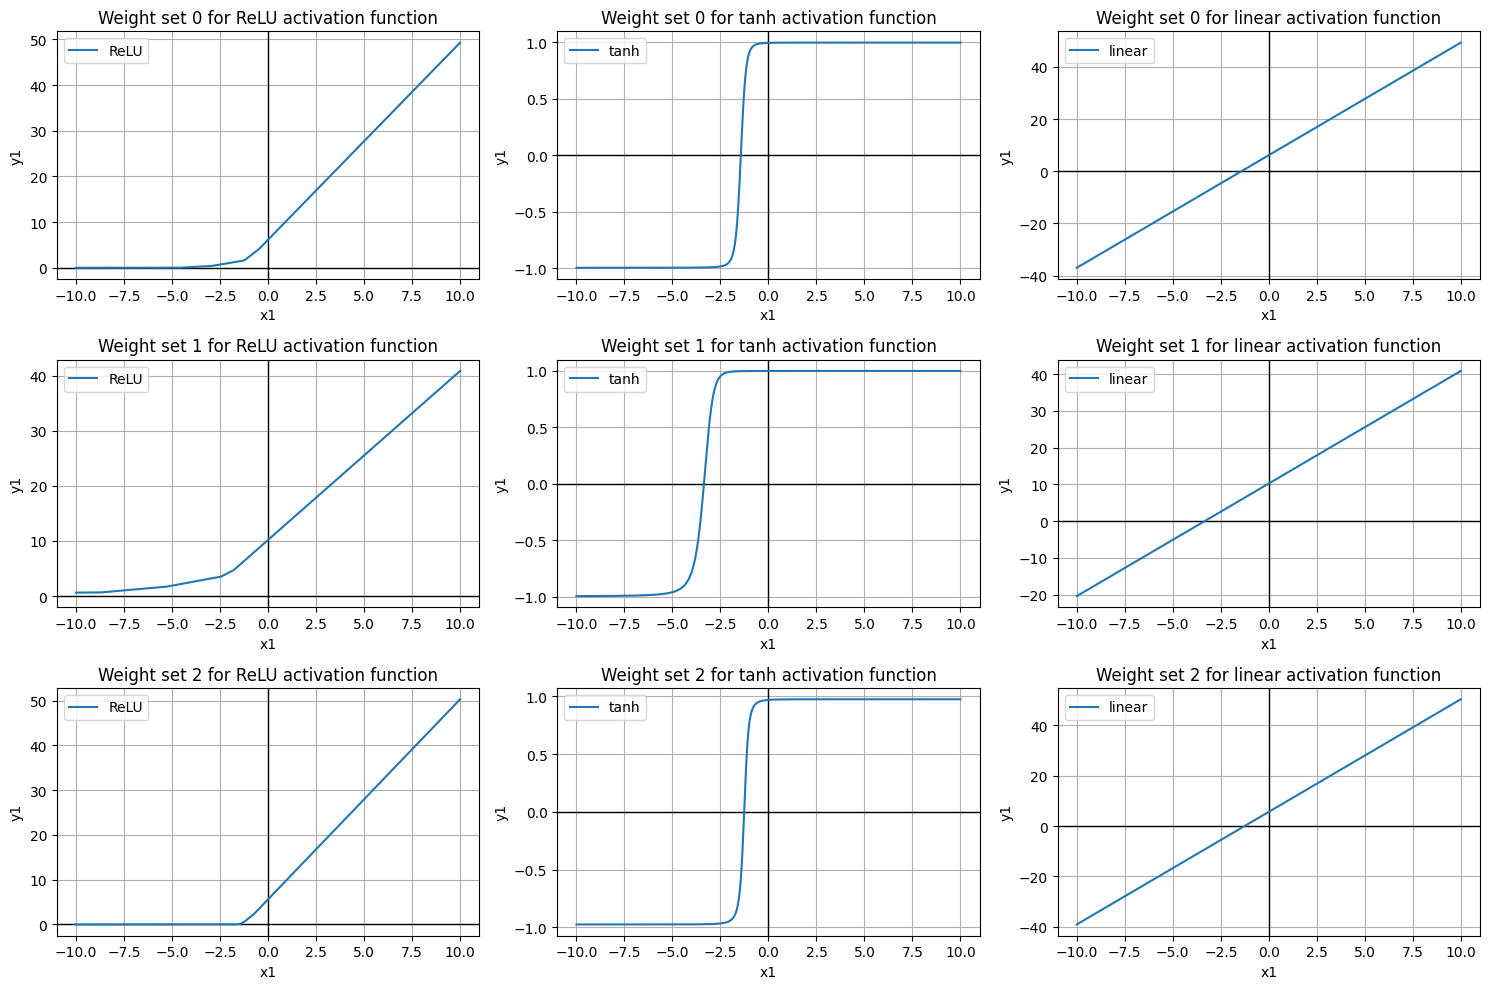

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
for i in range(3):
	for j in range(3):
		axs[i, j].grid()
		axs[i, j].axhline(linewidth = 1, color = "black")
		axs[i, j].axvline(linewidth = 1, color = "black")
		axs[i, j].plot(x, results[j][i], label = f"{activation_function_names[j]}")
		axs[i, j].set_title(f"Weight set {i} for {activation_function_names[j]} activation function")
		axs[i, j].set_xlabel('x1')
		axs[i, j].set_ylabel('y1')
		axs[i, j].legend()
plt.tight_layout()
plt.show()

##### Final considerations 

As we can see from the figures above the different sets of weights have a very perceivable effect on the final output. Although the plots are very similar which implies that the activation function has a much more significant impact on the input, the different sets of weights make the same function behave differently, so much so that we can visibly see the differences in the different plots (eg. left tail of ReLU can either have a smooth or steep transition to 0). 

## Optimization

### Mathematical exercises (34 pts + 2 bonus pts)
In the following exercises, when the exercise says “calculate”, it means you should show the detailed derivation. We denote by w an n-dimensional vector.
1. Calculate the gradient of the function f1(w) = ∥w∥2. Hint: write
out the function so that you express it as a function of the individual en-
tries wi; then take the partial derivatives as in the definition of a gradient.
2. (7 pts) Calculate the Hessian of the function f1(w) = ∥w∥2. Hint: start
from the result of the preceding.
3. (7 pts) Derive Newton’s method for optimizing f1(w) = ∥w∥2. It works
incredibly well; why?
4. (7 pts) Calculate the gradient of the function f0(w) = wT z for some fixed
vector z.
5. (5 pts) Calculate the gradient of the function
f2(w) = g(wT z) (4)
for some fixed (non-stochastic) vector z. Here, g is some differentiable
function R→ R. Hint: as always, write out the dot-product so you have
the function of the individual entries wi.
6. (5 pts) Calculate the stochastic gradient of the function
f3(w) = E{g(wT z)} (5)
for some random vector z.

### 1.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

np.random.seed(1)

#### (a)

In [ ]:
def f(x):
    w1 = x[0]
    w2 = x[1]
    return np.exp(-w2**2 - 2 * (w2 -1)**2) + np.exp(-(w1-1)**2 - 2*w2**2)

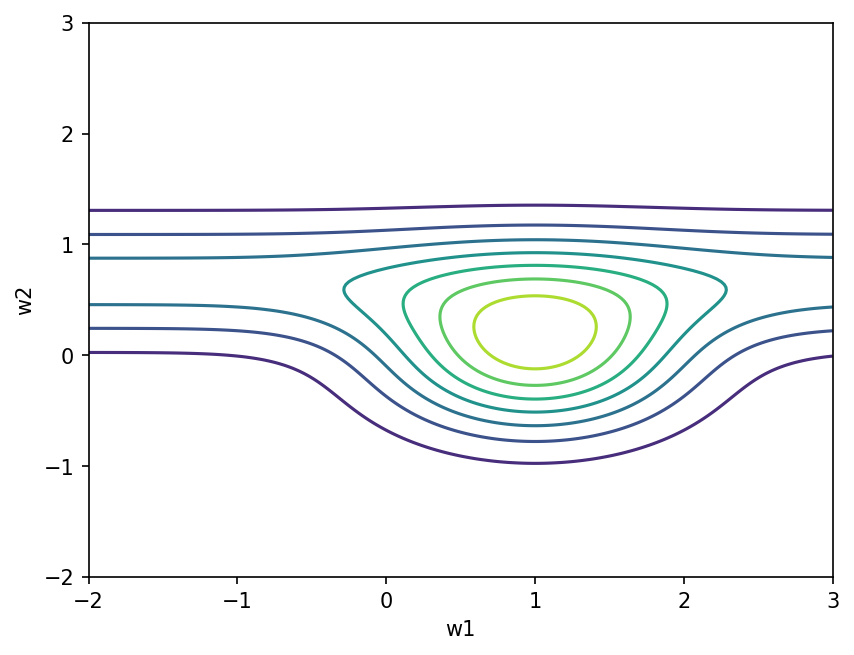

In [ ]:

# Code for plotting isocontours of the function f
vec_f = np.vectorize(f, signature="(n)->()")
w1 = np.linspace(-2.0, 3.0, 200)
w2 = np.linspace(-2.0, 3.0, 200)
W1, W2 = np.meshgrid(w1, w2)
Fs = vec_f(np.stack((W1, W2), axis=2))
plt.figure(dpi=150)
plt.contour(W1, W2, Fs)
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

#### (b)

**your solution here**

In [ ]:
def f_prime(x):
    w1 = x[0]
    w2 = x[1]
    return np.array([-2 * (w1-1) * np.exp( -(w1-1) ** 2 - 2 * w2**2 ), (-2*w2-4*(w2-1))*np.exp(-w2**2 - 2 * (w2 -1)**2)-4*w2*np.exp(-w2**2 - (w2 -1)**2)])

#### (c)

In [ ]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

step_size = 0.01
iterations = 0
treshold = 0.00001
weight_1_trajectory = [w1]
while True:
	w1_step = w1 + step_size * f_prime(w1)
	weight_1_trajectory.append(w1_step)
	if np.all(w1_step - w1 < treshold): break
	else: 
		w1 = w1_step
		iterations += 1
	

print(f"iterations for w1: {iterations}")
iterations = 0
weight_2_trajectory = [w2]

while True:
	w2_step = w2 + step_size * f_prime(w2)
	weight_2_trajectory.append(w2_step)
	if np.all(w2_step - w2 < treshold): break
	else: 
		w2 = w2_step
		iterations += 1
print(f"iterations for w2: {iterations}")
iterations = 0
weight_3_trajectory = [w3]

while True:
	w3_step = w3 + step_size * f_prime(w3)
	weight_3_trajectory.append(w3_step)

	if np.all(w3_step - w3 < treshold): break
	else: 
		w3 = w3_step
		iterations += 1
print(f"iterations for w3: {iterations}")

print(f"w1: {w1}")
print(f"w2: {w2}")
print(f"w3: {w3}")

iterations for w1: 469
iterations for w2: 414
iterations for w3: 0
w1: [0.99938246 0.32496789]
w2: [0.99938618 0.3249678 ]
w3: [1. 1.]


#### (d)

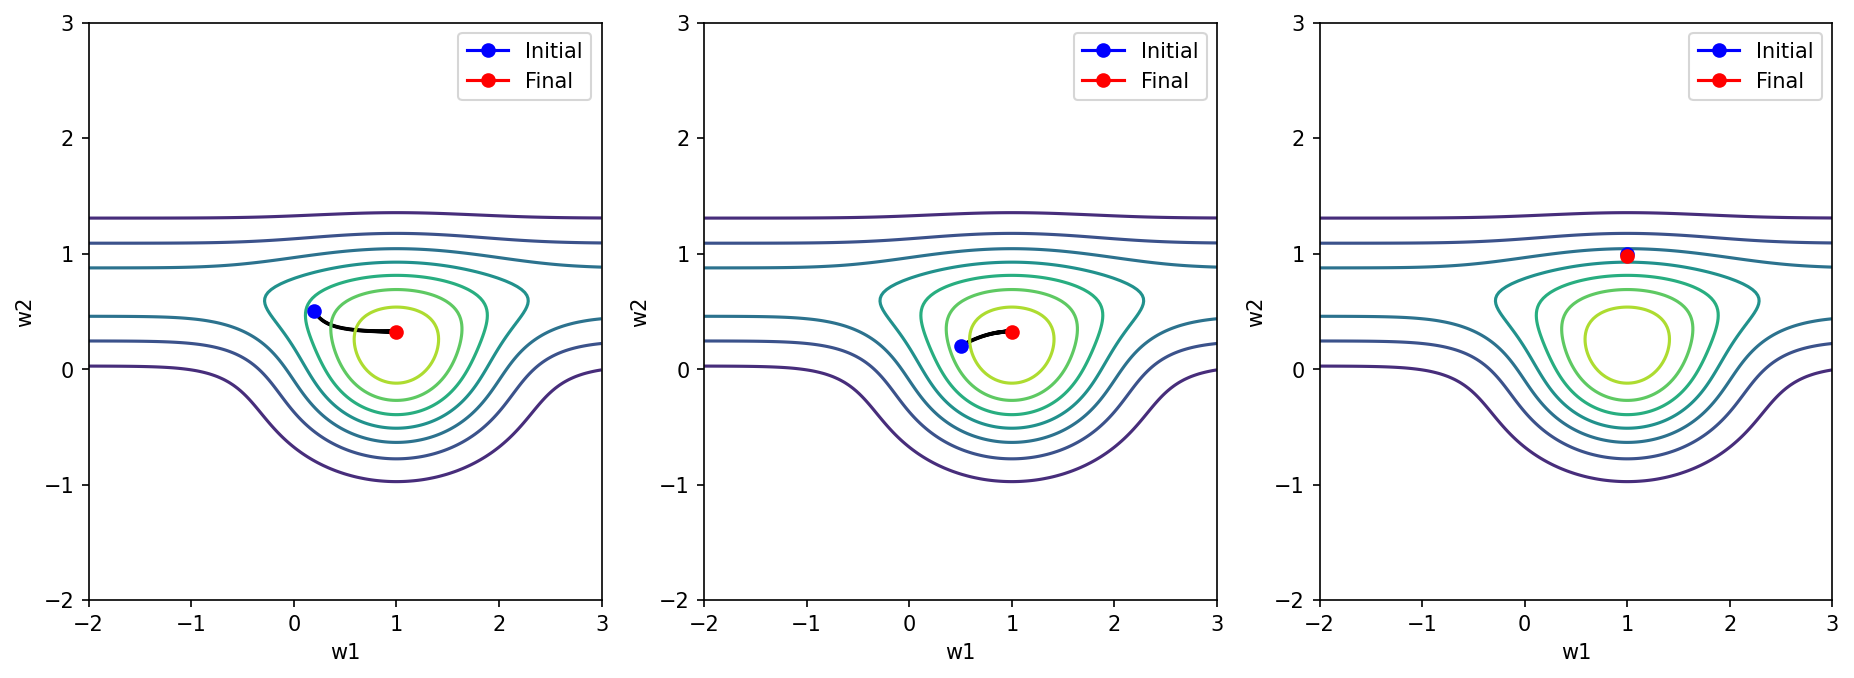

In [ ]:
w1 = np.asarray([0.2, 0.5])
w2 = np.asarray([0.5, 0.2])
w3 = np.asarray([1.0, 1.0])

trajectories = [weight_1_trajectory, weight_2_trajectory, weight_3_trajectory]
# Code for plotting.
fig, axes = plt.subplots(1, 3, figsize=(15, 5), dpi=150)
for i, weight in enumerate([w1, w2, w3]):
    ax = axes[i]
    ax.contour(W1, W2, Fs)
    ax.plot(weight[0], weight[1], marker="o", color="blue", label="Initial")
    trajectory = trajectories[i]
    for j in range(1, len(trajectory)):
        x, y = trajectory[j]
        dx, dy = trajectory[j] - trajectory[j-1]
        ax.arrow(x, y, dx, dy, length_includes_head=True, width=0.003)
    ax.plot(trajectory[-1][0], trajectory[-1][1], marker="o", color="red", label="Final")
    ax.set_xlabel("w1")
    ax.set_ylabel("w2")
    ax.legend()
plt.show()

#### (e)

In [ ]:
# Code for plotting.
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i, w in enumerate(weight_1_trajectory):
    axs[i].plot()
    axs[i].set_xlabel("Number of iterations")
    axs[i].set_ylabel("Function value")
plt.show()

#### (f)

**your solution here**